In [1]:
# Wronskian and independent solutions
import sympy as sy # Importing Sympy for symbolic calculations
sy.init_printing() # For LaTeX formatted output
from IPython.display import display, Latex # For displaying the output
display(Latex("Ex. Test whether the solutions $y_1=\cos x$ and $y_2=\sin x$ of the DE $y''+y=0$ are LI."))
display(Latex('Sol. Here the Wronskian is'))
x,y,C_1,C_2, W = sy.symbols('x,y,C_1,C_2, W') # Declaring the symbols
y1=sy.cos(x);y2=sy.sin(x); # Enter the given y1 and y2 here
Wr=sy.simplify(y1*sy.diff(y2,x)-y2*sy.diff(y1,x))
display(sy.Eq(W,Wr))
if Wr==0:
    display(Latex('which is identically 0. So $y_1$ and $y_2$ are LD.'))
else:
    display(Latex('which is identically non-zero. So $y_1$ and $y_2$ are LI.'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [2]:
display(Latex("Ex. Test whether the solutions $y_1=\cos x$ and $y_2=2\cos x$ of the DE $y''+y=0$ are LI."))
display(Latex('Sol. Here the Wronskian W is'))
x,y,C_1,C_2,W = sy.symbols('x,y,C_1,C_2,W') # Declaring the symbols
y1=sy.cos(x);y2=2*sy.cos(x);
Wr=sy.simplify(y1*sy.diff(y2,x)-y2*sy.diff(y1,x))
display(sy.Eq(W,Wr))
if Wr==0:
    display(Latex('which is identically 0. So $y_1$ and $y_2$ are LD.'))
else:
    display(Latex('which is identically non-zero. So $y_1$ and $y_2$ are LI.'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

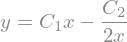

In [3]:
# Use of known solution to find another
display(Latex("Ex. Find general solution of $x^2y''+xy'-y=0$ given that $y_1=x$ is a solution."))
display(Latex('Sol. The solution is'))
x,y,C_1,C_2 = sy.symbols('x,y,C_1,C_2') # Declaring the symbols
y1=x;px=1/x; # Enter y1 and p(x) here
sol = C_1*y1+C_2*y1*sy.integrate(1/y1**2*(sy.exp(sy.integrate(-px,x))),x)
display(sy.Eq(y,sol))

In [4]:
# Homogeneous LDE y''+py'+qy = 0 with Constant Coefficients p and q
display(Latex("Ex. Solve the DE $y''+y'-6y=0$."))
display(Latex('Sol. Here the AE is'))
x,y,C_1,C_2,m = sy.symbols('x,y,C_1,C_2,m') # Declaring the symbols
p=1;q=-6; # Enter p and q here
k=sy.Rational(1,2)
display(sy.Eq(m**2+p*m+q,0))
display(Latex('with the roots:'))
display(sy.solve(sy.Eq(m**2+p*m+q,0),m))
display(Latex('So the solution of the given DE is'))
if p**2-4*q > 0:
    sol=C_1*sy.exp((-p+(p**2-4*q)**k)*x/2)+C_2*sy.exp((-p-(p**2-4*q)**k)*x/2)
    display(sy.Eq(y,sol))
elif p**2-4*q == 0:
    sol=C_1*sy.exp((-p+(p**2-4*q)**k)*x/2)+C_2*x*sy.exp((-p-(p**2-4*q)**k)*x/2)
    display(sy.Eq(y,sol))
else:
    sol=sy.exp(-p*x/2)*(C_1*sy.cos((-p**2+4*q)**(k)*x/2)+C_2*sy.sin((-p**2+4*q)**(k)*x/2))
    display(sy.Eq(y,sol))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

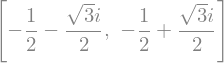

<IPython.core.display.Latex object>

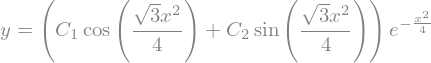

In [5]:
# Using the transformation $z=\int \sqrt{q(x)}dx$ or $z'=\sqrt{q(x)}$
from sympy.simplify.simplify import nthroot
display(Latex("Ex. Reduce  $xy''+(x^2-1)y'+x^3y=0$ to a homogeneous\
LDE with constant coefficients and hence solve it."))
display(Latex('Sol. Here the AE is'))
x,y,z,C_1,C_2,m = sy.symbols('x,y,z,C_1,C_2,m') # Declaring the symbols
px=x-1/x; qx=x**2; # Enter p(x) and q(x) here. In case of x^2y''+pxy'+qy=0, use px=p/x,qx=1/x^2 
h=sy.simplify((sy.diff(qx,x)+2*px*qx)/(2*sy.powdenest(qx**(sy.Rational(3,2)),force=True)))
#display(h)
if sy.diff(h,x)==0:
    p=h;q=1; # In case of x^2y''+pxy'+qy=0, use q=q
    k=sy.Rational(1,2)
    display(sy.Eq(m**2+p*m+q,0))
    display(Latex('with the roots:'))
    display(sy.solve(sy.Eq(m**2+p*m+q,0),m))
    display(Latex('So the solution of the given DE is'))
    if p**2-4*q > 0:
        sol=C_1*sy.exp((-p+(p**2-4*q)**k)*z/2)+C_2*sy.exp((-p-(p**2-4*q)**k)*z/2)
        display(sy.Eq(y,sol.subs(z,sy.integrate(sy.sqrt(qx,x)))))
    elif p**2-4*q == 0:
        sol=C_1*sy.exp((-p+(p**2-4*q)**k)*z/2)+C_2*x*sy.exp((-p-(p**2-4*q)**k)*z/2)
        display(sy.Eq(y,sol.subs(z,sy.integrate(sy.sqrt(qx,x)))))
    else:
        sol=sy.exp(-p*z/2)*(C_1*sy.cos((-p**2+4*q)**(k)*z/2)+C_2*sy.sin((-p**2+4*q)**(k)*z/2))
        display(sy.Eq(y,sol.subs(z,sy.integrate(sy.sqrt(qx,x)))))
else:
    display(Latex('The transformation $z=\int \sqrt{q(x)}dx$ does not lead to DE with constant coeff.'))

In [6]:
# Method of variation of parameters
display(Latex("Ex. Use the method variation of parameters to find a particular solution of  $y''+y=\csc x$."))
display(Latex('Sol. The particular solution is'))
x,y,C_1,C_2 = sy.symbols('x,y,C_1,C_2') # Declaring the symbols
y1=sy.cos(x);y2=sy.sin(x); rx=1/sy.sin(x) # Enter y1, y2 and rx here
W=sy.simplify(y1*sy.diff(y2,x)-y2*sy.diff(y1,x))
sol=y1*sy.integrate(-y2*rx/W,x)+y2*sy.integrate(y1*rx/W,x)
display(sy.Eq(y,sol))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
# IVP
display(Latex("Ex. DE $y''+y = 0$ with the initial conditions $y(0)=1$, $y'(0)=0$."))
display(Latex('Sol. '))
x = sy.symbols('x'); y = sy.symbols('y', cls=sy.Function)
#Enter the differential equation (DE): y’’+y=0
a2=1; a1=0;a0=1;r=0
DE = sy.Eq(a2*y(x).diff(x, x) - a1*y(x).diff(x) + a0*y(x), r)
# Solve the DE
sol = sy.dsolve(DE,y(x))
# Print the solution
display(sol)
# Solving C1 and C2 from the intial conditions y(0)=1, y’(0)=0
constants = sy.solve([sol.rhs.subs(x,0) - 1, sol.rhs.diff(x,1).subs(x,0)- 0])
display(constants)
# Final solution
C1, C2 = sy.symbols('C1,C2')
fsol = sol.subs(constants)
display(fsol)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

x = [ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
Numerical Solution = [ 1.          0.86466369  0.49528666 -0.00815089 -0.5093822  -0.87273772
 -0.99986711 -0.85635986 -0.48105947  0.02445055  0.52334249  0.88057996
  0.99946858  0.84782845  0.46670439 -0.04074376 -0.53716372 -0.8881882
 -0.99880449 -0.83907176]
Exact Solution = [ 1.          0.8646637   0.49528663 -0.00815095 -0.5093823  -0.87273782
 -0.99986712 -0.8563598  -0.48105935  0.02445069  0.52334259  0.88058
  0.99946853  0.84782832  0.46670422 -0.04074393 -0.53716381 -0.88818817
 -0.99880433 -0.83907153]


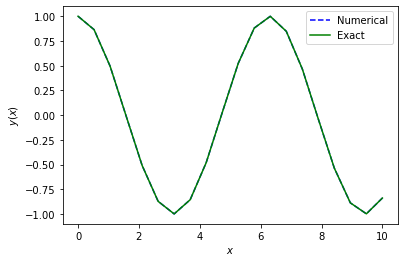

<IPython.core.display.Latex object>

In [8]:
# Numerical solution of IVP
display(Latex("Ex. Find numerical solution of $y''+y = 0$, $y(0)=1$, $y'(0)=0$ at equispaced 20 points\
in the interval $[0,10]$, and compare with the exact solution."))
display(Latex('Sol. '))
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
def dydx(v, x):
# let y’=z so that given DE reduces to the system: y’=z and z’= -(a1/a2)*z- (a0/a2)*y +
    y, z = v
    a2=1; a1=0;a0=1;r=0
    return [z, -(a1/a2)*z- (a0/a2)*y + r/a2]
x = np.linspace(0, 10, 20)
w = odeint(dydx, [1,0], x) # Here [1,0] stands for the IC [y(0),y’(0)]=[1,0]
y = w[:,0] # y’ = w[:,1]
print('x =',x) # It prints the chosen 20 x-values
print('Numerical Solution =',y) # It prints the numerical solution of the DE at the chosen 20 x-values.
def f(x):   # Here f defines the exact solution y=f(x)=cos(x) of y''+y = 0, y(0)=1, y'(0)=0.
    return np.cos(x)
print('Exact Solution =',f(x)) # It prints the exact solution of the DE at the chosen 20 x-values.
# plot results
plt.plot(x,y,'b--',label='Numerical')
plt.plot(x,np.cos(x),'g',label='Exact')
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.show()
display(Latex("Notice that the two solution curves (numerical and exact) overlap each other, as expected."))